# Anomaly Detection in Univariate Time Series with Random Forest, in the context of WISDom project: Time Series Data Analysis

### Flow Rate Data from a sensor in a Water Sypply System located in Barreiro

## Acquiring information

Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')
Feature Names
Index(['date', 'time', 'value', 'detection'], dtype='object')
Feature Names
Index(['date'], dtype='object')
Data Dimension:
Number of Records: 480
Number of Features: 4
Data Dimension:
Number of Records: 96
Number of Features: 4
Data Dimension:
Number of Records: 767
Number of Features: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       96 non-null    

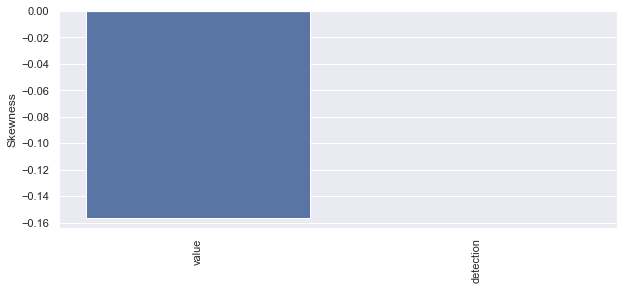

Skewness of the below features:
value       -0.104418
detection    2.038954
dtype: float64


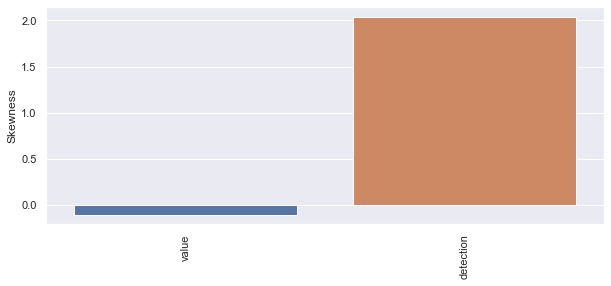

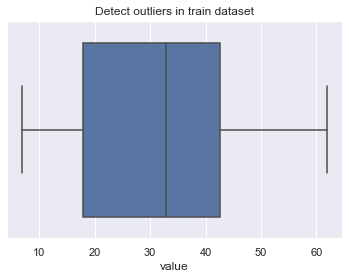

Interquartile range: 24.6293


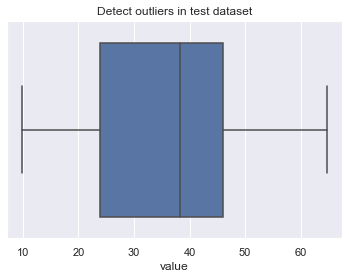

Interquartile range: 22.1598495375


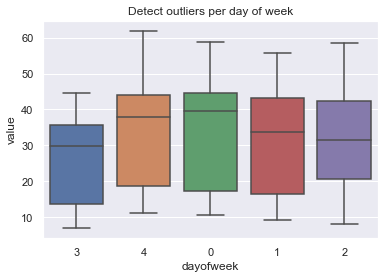

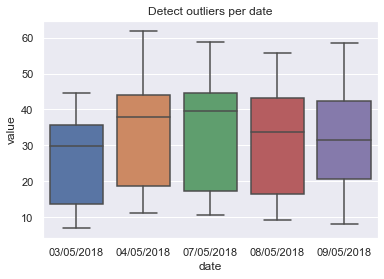

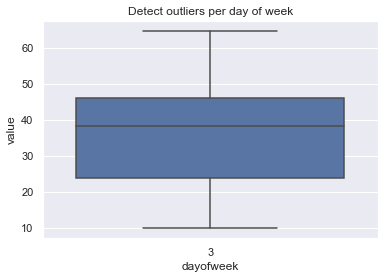

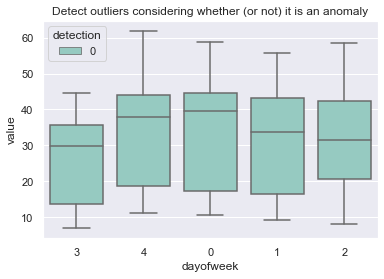

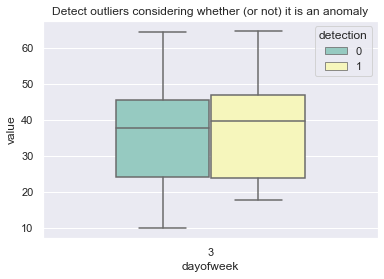

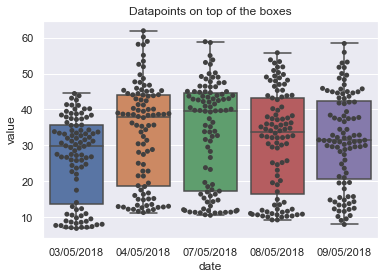

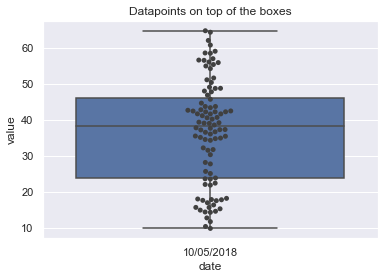

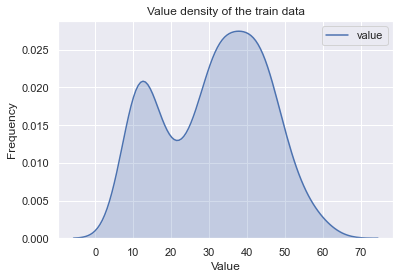

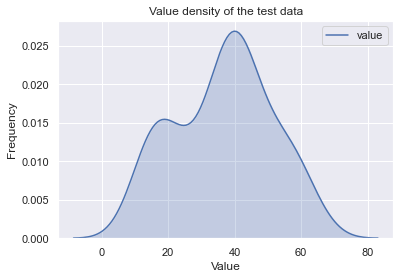

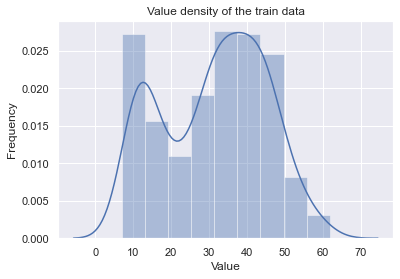

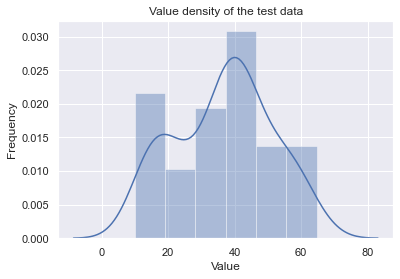

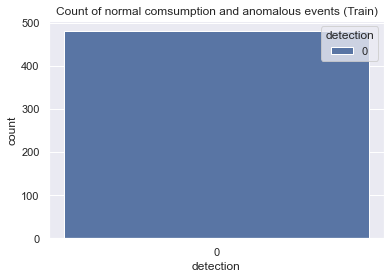

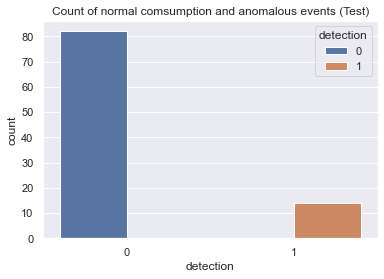

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    object 
 4   int_date   480 non-null    int32  
 5   timestamp  480 non-null    int64  
 6   dayofweek  480 non-null    int64  
 7   month      480 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 28.2+ KB


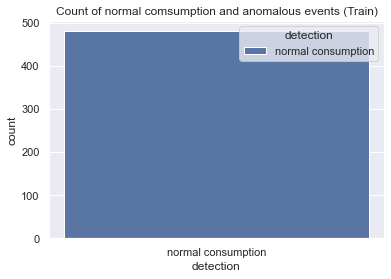

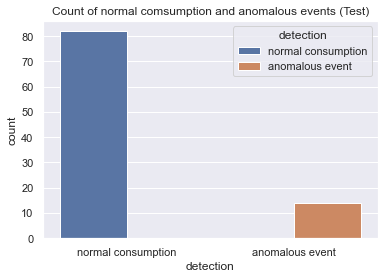

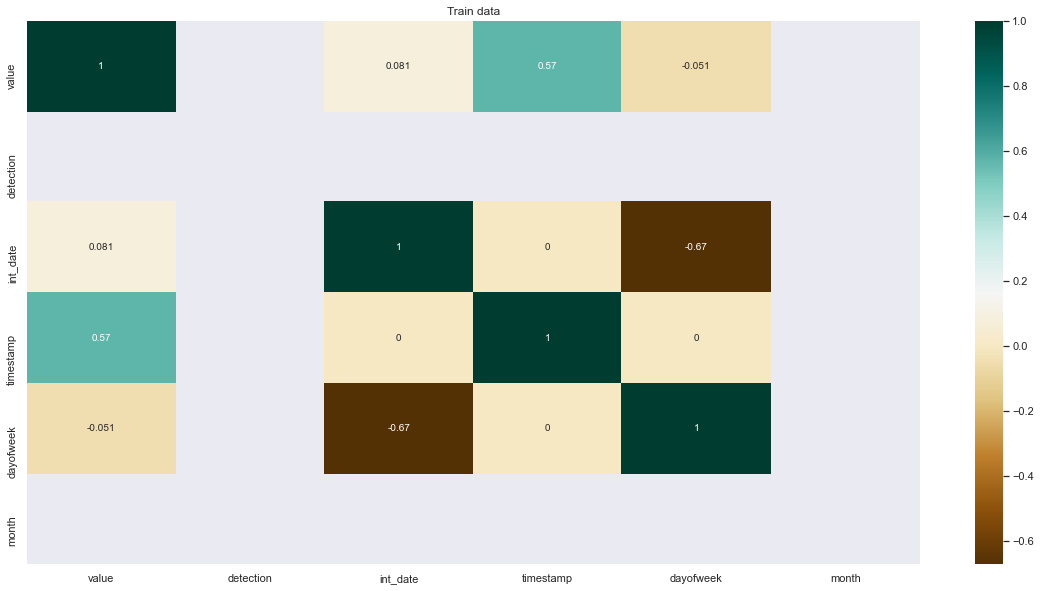

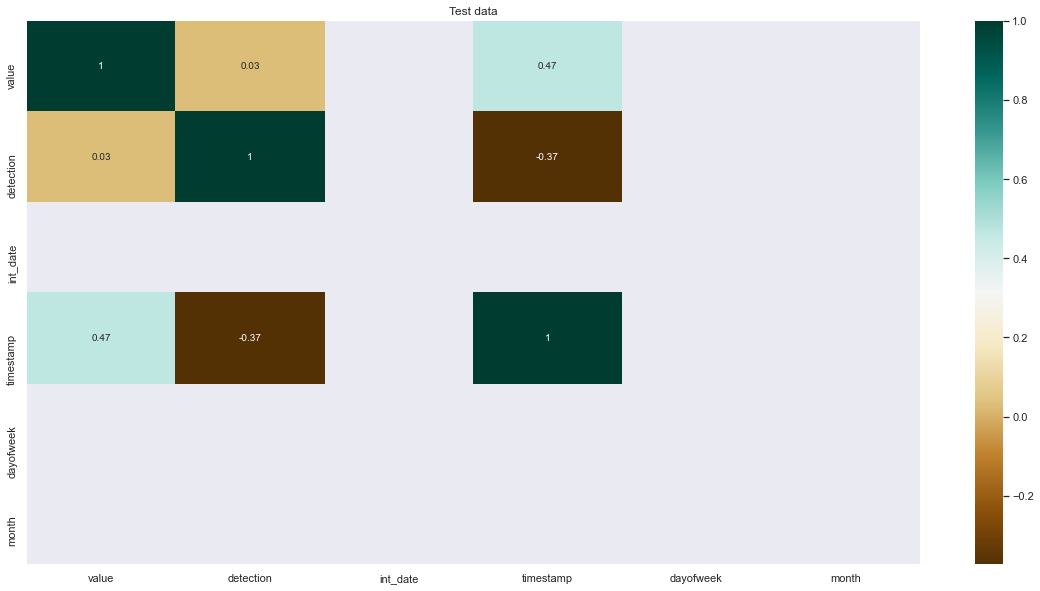

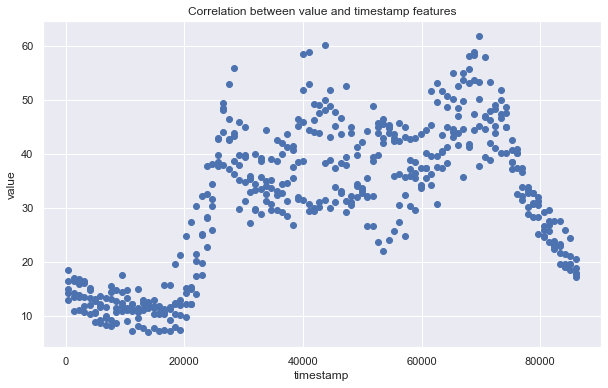

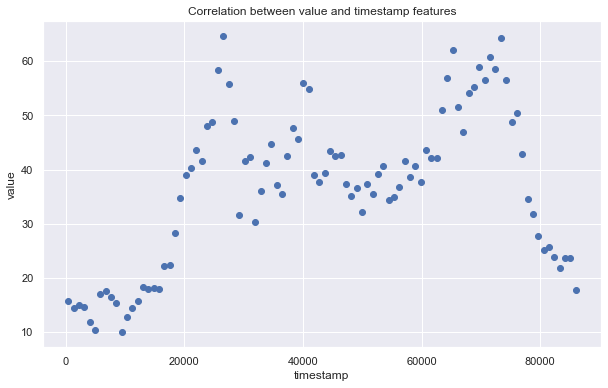

In [1]:
# To run RandomForest_EDA python script
%run RandomForest_EDA.ipynb

## Libraries and Packages

In [2]:
# Matplotlib represents dates using floating point numbers specifying the number of days since a default epoch of 1970-01-01 UTC
import matplotlib.dates as mdates

# Decompose Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

## Data

### Train data

In [3]:
# Visualize data
train

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,03/05/2018,00:07:30,13.026578,0,20180503,450,3,5
1,03/05/2018,00:22:30,10.898906,0,20180503,1350,3,5
2,03/05/2018,00:37:30,11.048772,0,20180503,2250,3,5
3,03/05/2018,00:52:30,10.641706,0,20180503,3150,3,5
4,03/05/2018,01:07:30,10.452578,0,20180503,4050,3,5
...,...,...,...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509,82350,2,5
476,09/05/2018,23:07:30,19.707922,0,20180509,83250,2,5
477,09/05/2018,23:22:30,19.546844,0,20180509,84150,2,5
478,09/05/2018,23:37:30,21.068406,0,20180509,85050,2,5


In [4]:
# Start time and end time
train['date'].min(), train['date'].max()

('03/05/2018', '09/05/2018')

#### New column: 'datetime'

In [5]:
# Join columns date and time
train['datetime'] = train['date'] + ' ' + train['time']
train

,date,time,value,detection,int_date,timestamp,dayofweek,month,datetime
0,03/05/2018,00:07:30,13.026578,0,20180503,450,3,5,03/05/2018 00:07:30
1,03/05/2018,00:22:30,10.898906,0,20180503,1350,3,5,03/05/2018 00:22:30
2,03/05/2018,00:37:30,11.048772,0,20180503,2250,3,5,03/05/2018 00:37:30
3,03/05/2018,00:52:30,10.641706,0,20180503,3150,3,5,03/05/2018 00:52:30
4,03/05/2018,01:07:30,10.452578,0,20180503,4050,3,5,03/05/2018 01:07:30
...,...,...,...,...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509,82350,2,5,09/05/2018 22:52:30
476,09/05/2018,23:07:30,19.707922,0,20180509,83250,2,5,09/05/2018 23:07:30
477,09/05/2018,23:22:30,19.546844,0,20180509,84150,2,5,09/05/2018 23:22:30
478,09/05/2018,23:37:30,21.068406,0,20180509,85050,2,5,09/05/2018 23:37:30


### Data Transformation

In [6]:
# The strftime() method returns a string representing date and time using date, time or datetime object
train['datetime'] = pd.to_datetime(train['datetime'], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M:%S').astype(str)
# Visualize data
train

,date,time,value,detection,int_date,timestamp,dayofweek,month,datetime
0,03/05/2018,00:07:30,13.026578,0,20180503,450,3,5,2018-05-03 00:07:30
1,03/05/2018,00:22:30,10.898906,0,20180503,1350,3,5,2018-05-03 00:22:30
2,03/05/2018,00:37:30,11.048772,0,20180503,2250,3,5,2018-05-03 00:37:30
3,03/05/2018,00:52:30,10.641706,0,20180503,3150,3,5,2018-05-03 00:52:30
4,03/05/2018,01:07:30,10.452578,0,20180503,4050,3,5,2018-05-03 01:07:30
...,...,...,...,...,...,...,...,...,...
475,09/05/2018,22:52:30,22.357783,0,20180509,82350,2,5,2018-05-09 22:52:30
476,09/05/2018,23:07:30,19.707922,0,20180509,83250,2,5,2018-05-09 23:07:30
477,09/05/2018,23:22:30,19.546844,0,20180509,84150,2,5,2018-05-09 23:22:30
478,09/05/2018,23:37:30,21.068406,0,20180509,85050,2,5,2018-05-09 23:37:30


In [7]:
# Start time and end time
train['datetime'].min(), train['datetime'].max()

('2018-05-03 00:07:30', '2018-05-09 23:52:30')

In [8]:
# .info() function is used to get a concise summary of the DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       480 non-null    object 
 1   time       480 non-null    object 
 2   value      480 non-null    float64
 3   detection  480 non-null    int64  
 4   int_date   480 non-null    int32  
 5   timestamp  480 non-null    int64  
 6   dayofweek  480 non-null    int64  
 7   month      480 non-null    int64  
 8   datetime   480 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 32.0+ KB


In [9]:
# Immutable ndarray-like of datetime64 data
# Represented internally as int64, and which can be boxed to Timestamp objects that are subclasses of datetime and carry metadata.
train['datetime'] = pd.DatetimeIndex(data=train['datetime'], dtype='datetime64[ns]', name='datetime', freq=None)

In [10]:
# .info() function is used to get a concise summary of the DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       480 non-null    object        
 1   time       480 non-null    object        
 2   value      480 non-null    float64       
 3   detection  480 non-null    int64         
 4   int_date   480 non-null    int32         
 5   timestamp  480 non-null    int64         
 6   dayofweek  480 non-null    int64         
 7   month      480 non-null    int64         
 8   datetime   480 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(2)
memory usage: 32.0+ KB


In [11]:
# Group DataFrame using a mapper or by a Series of columns
df = train.groupby('datetime')['value'].sum().reset_index()
# Visualize data
df

,datetime,value
0,2018-05-03 00:07:30,13.026578
1,2018-05-03 00:22:30,10.898906
2,2018-05-03 00:37:30,11.048772
3,2018-05-03 00:52:30,10.641706
4,2018-05-03 01:07:30,10.452578
...,...,...
475,2018-05-09 22:52:30,22.357783
476,2018-05-09 23:07:30,19.707922
477,2018-05-09 23:22:30,19.546844
478,2018-05-09 23:37:30,21.068406


In [12]:
# Start time and end time
df['datetime'].min(), df['datetime'].max()

(Timestamp('2018-05-03 00:07:30'), Timestamp('2018-05-09 23:52:30'))

In [13]:
# Set the DataFrame index using existing columns
df = df.set_index('datetime')
# The index (row labels) of the DataFrame
df.index

DatetimeIndex(['2018-05-03 00:07:30', '2018-05-03 00:22:30',
               '2018-05-03 00:37:30', '2018-05-03 00:52:30',
               '2018-05-03 01:07:30', '2018-05-03 01:22:30',
               '2018-05-03 01:37:30', '2018-05-03 01:52:30',
               '2018-05-03 02:07:30', '2018-05-03 02:22:30',
               ...
               '2018-05-09 21:37:30', '2018-05-09 21:52:30',
               '2018-05-09 22:07:30', '2018-05-09 22:22:30',
               '2018-05-09 22:37:30', '2018-05-09 22:52:30',
               '2018-05-09 23:07:30', '2018-05-09 23:22:30',
               '2018-05-09 23:37:30', '2018-05-09 23:52:30'],
              dtype='datetime64[ns]', name='datetime', length=480, freq=None)

#### Final dataset

In [14]:
# Visualize data
df

,value
datetime,
2018-05-03 00:07:30,13.026578
2018-05-03 00:22:30,10.898906
2018-05-03 00:37:30,11.048772
2018-05-03 00:52:30,10.641706
2018-05-03 01:07:30,10.452578
...,...
2018-05-09 22:52:30,22.357783
2018-05-09 23:07:30,19.707922
2018-05-09 23:22:30,19.546844


In [15]:
dic = df.to_dict()

In [16]:
dic

{'value': {Timestamp('2018-05-03 00:07:30'): 13.02657778,
  Timestamp('2018-05-03 00:22:30'): 10.89890556,
  Timestamp('2018-05-03 00:37:30'): 11.04877222,
  Timestamp('2018-05-03 00:52:30'): 10.64170556,
  Timestamp('2018-05-03 01:07:30'): 10.45257778,
  Timestamp('2018-05-03 01:22:30'): 8.923088889,
  Timestamp('2018-05-03 01:37:30'): 8.638288889,
  Timestamp('2018-05-03 01:52:30'): 8.334466667000001,
  Timestamp('2018-05-03 02:07:30'): 8.100783332999999,
  Timestamp('2018-05-03 02:22:30'): 8.70625,
  Timestamp('2018-05-03 02:37:30'): 12.43553889,
  Timestamp('2018-05-03 02:52:30'): 9.029188889,
  Timestamp('2018-05-03 03:07:30'): 7.252783332999999,
  Timestamp('2018-05-03 03:22:30'): 9.600288889,
  Timestamp('2018-05-03 03:37:30'): 7.778016667,
  Timestamp('2018-05-03 03:52:30'): 6.946066667,
  Timestamp('2018-05-03 04:07:30'): 7.7365222220000005,
  Timestamp('2018-05-03 04:22:30'): 7.166511111,
  Timestamp('2018-05-03 04:37:30'): 7.321005556,
  Timestamp('2018-05-03 04:52:30'): 7.2

In [24]:
data = pd.DataFrame.from_dict(dic)

In [25]:
data

,value
2018-05-03 00:07:30,13.026578
2018-05-03 00:22:30,10.898906
2018-05-03 00:37:30,11.048772
2018-05-03 00:52:30,10.641706
2018-05-03 01:07:30,10.452578
...,...
2018-05-09 22:52:30,22.357783
2018-05-09 23:07:30,19.707922
2018-05-09 23:22:30,19.546844
2018-05-09 23:37:30,21.068406


In [28]:
pd.set_option('display.max_rows', 200)

## Indexing in Time Series Data

### Obtain all data on the day before the rupture (knowing that the rupture occurred on 10-05-2018)
#### Syntax: ['date']

In [29]:
# Access a group of rows and columns by label(s) or a boolean array
df.loc['2018-05-09']

,value
datetime,
2018-05-09 00:07:30,14.290111
2018-05-09 00:22:30,13.445306
2018-05-09 00:37:30,13.834756
2018-05-09 00:52:30,11.765706
2018-05-09 01:07:30,13.302483
2018-05-09 01:22:30,10.522383
2018-05-09 01:37:30,9.178794
2018-05-09 01:52:30,9.612444
2018-05-09 02:07:30,15.531439


### First record of each day
#### Syntax: ['start date': 'end date': step]

In [30]:
# Access a group of rows and columns by label(s) or a boolean array
df.loc['2018-05-03':'2018-05-09':96]

,value
datetime,
2018-05-03 00:07:30,13.026578
2018-05-04 00:07:30,18.588483
2018-05-07 00:07:30,16.467322
2018-05-08 00:07:30,15.008514
2018-05-09 00:07:30,14.290111


### Visualizing Flow Rate Time Series Data

In [31]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

####  Line plot of the full time series of flow rate values

Text(0, 0.5, 'Flow Rate (m3-s)')

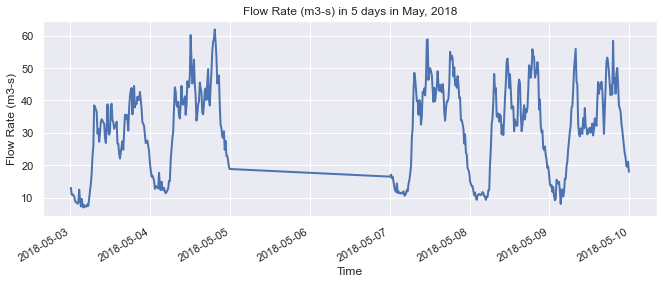

In [47]:
# Change line width of lines in matplotlib
df['value'].plot(linewidth=2).set_title('Flow Rate (m3-s) in 5 days in May, 2018')
plt.xlabel('Time')
plt.ylabel('Flow Rate (m3-s)')

In [ ]:
# Change line width of lines in matplotlib
df['value'].plot(linewidth=2,figsize=[8,4]).set_title('Flow Rate (m3-s) (daily data)')
plt.xlabel('Time (day)')
plt.ylabel('Flow Rate (m3-s)')

In [ ]:
# Change line width of lines in matplotlib
dfT['value'].plot(linewidth=2,figsize=[8,4]).set_title('Flow Rate (m3-s) (daily data)')
plt.xlabel('Time (day and hour)')
plt.ylabel('Flow Rate (m3-s)')

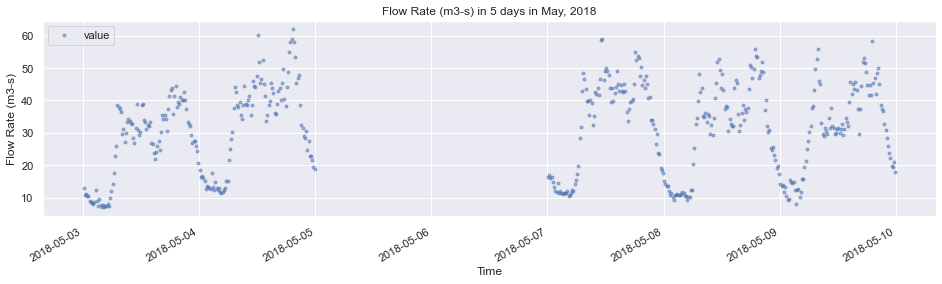

In [48]:
# Names of the columns to plot
cols_plot = ['value']
# The alpha channel can be used to soften colours for more visually appealing plots
# Create a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots,
# including the enclosing figure object, in a single call.
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 4), subplots=True)

for ax in axes:
    ax.set_title('Flow Rate (m3-s) in 5 days in May, 2018')
    ax.set_ylabel('Flow Rate (m3-s)')
    ax.set_xlabel('Time')

#### Seasonality

Text(0, 0.5, 'Flow Rate (m3-s)')

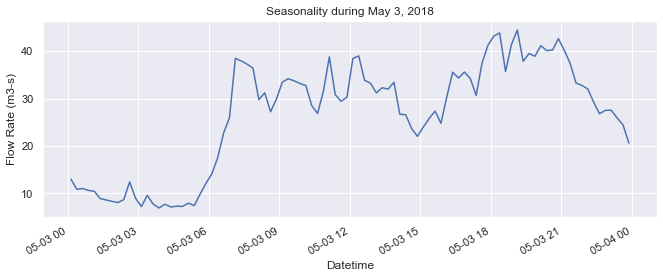

In [49]:
ax = df.loc['2018-05-03', 'value'].plot()
ax.set_title('Seasonality during May 3, 2018')
ax.set_xlabel('Datetime')
ax.set_ylabel('Flow Rate (m3-s)')

In [ ]:
# Water consumption pattern

#### Drastic decrease 

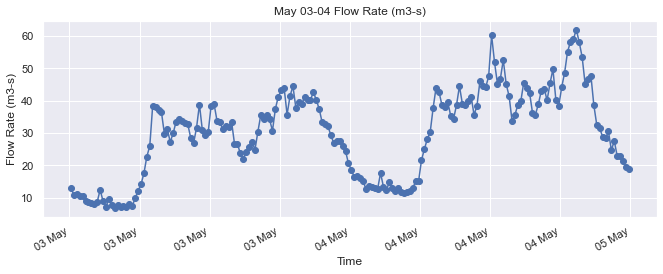

In [51]:
ax = df.loc['2018-05-03':'2018-05-04', 'value'].plot(marker='o', linestyle='-')
ax.set_title('May 03-04 Flow Rate (m3-s)')
ax.set_xlabel('Time')
ax.set_ylabel('Flow Rate (m3-s)')
# Set x-axis major ticks to weekly interval, on Mondays
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %h'))

## Seasonality

Text(0.5, 1.0, 'Seasonality per day')

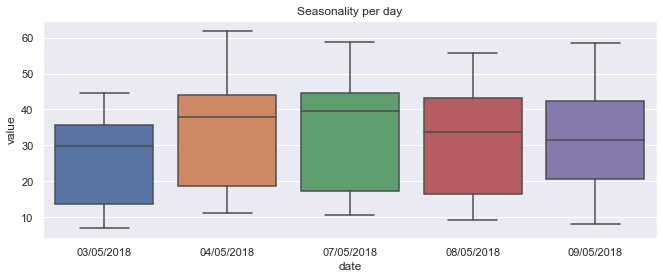

In [52]:
sns.boxplot(data=train, x='date', y='value').set_title('Seasonality per day')

In [ ]:
# Detect outliers in RandomForest_EDA script

## Time-Resampling using Pandas

#### Important rules for which we show our time series index

M = end of month

A = end of the year

MS = beginning of the month

AS = beginning of the year

### Calculate the average value of each day

In [53]:
# 1D means one day
df.resample('1D').mean().head(7)

,value
datetime,
2018-05-03,26.572933
2018-05-04,33.420752
2018-05-05,NaN
2018-05-06,NaN
2018-05-07,33.542173
2018-05-08,31.218631
2018-05-09,31.529368


In [54]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['value']
# Resample to weekly frequency, aggregating with mean
daily_mean = df[data_columns].resample('1D').mean()
daily_mean.head(7)

,value
datetime,
2018-05-03,26.572933
2018-05-04,33.420752
2018-05-05,NaN
2018-05-06,NaN
2018-05-07,33.542173
2018-05-08,31.218631
2018-05-09,31.529368


### 15min Meand and Daily Mean

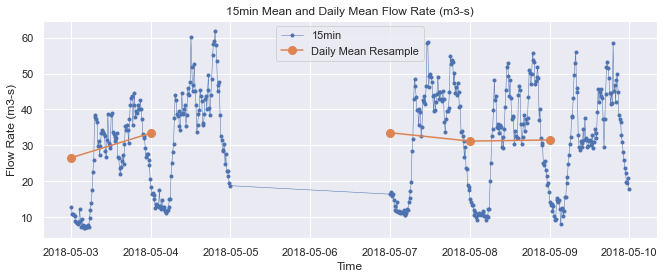

In [56]:
# Start and end of the date range to extract
start, end = '2018-05-03', '2018-05-09'
# Plot 15min and daily resampled time series together
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'value'], marker='.', linestyle='-', linewidth=0.5, label='15min')
ax.plot(daily_mean.loc[start:end, 'value'], marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.set_title('15min Mean and Daily Mean Flow Rate (m3-s)')
ax.set_xlabel('Time')
ax.set_ylabel('Flow Rate (m3-s)')
ax.legend();

### Explore the daily time series by plotting the water consumption as a line plot

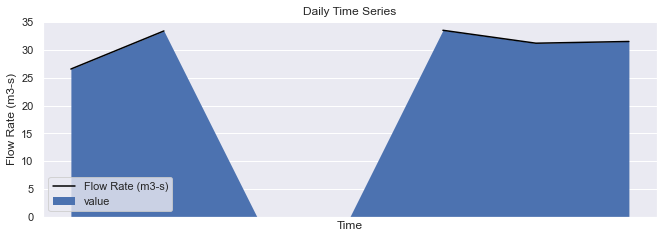

In [57]:
fig, ax = plt.subplots()
ax.plot(daily_mean['value'], color='black', label='Flow Rate (m3-s)')
daily_mean[['value']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_title('Daily Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Flow Rate (m3-s)')
ax.legend()

In [ ]:
# Not achieved due to lack of data and parameter adjustment

## Rolling Windows on Time Series

#### Similar to Time-Resampling, but take a window of any size and perform a function on it.
A rolling window of size k means k consecutive values.

In [28]:
# window=1 consumption days
df.rolling(window=1).mean().head(7)

,value
datetime,
2018-05-03 00:07:30,13.026578
2018-05-03 00:22:30,10.898906
2018-05-03 00:37:30,11.048772
2018-05-03 00:52:30,10.641706
2018-05-03 01:07:30,10.452578
2018-05-03 01:22:30,8.923089
2018-05-03 01:37:30,8.638289


In [31]:
# 1D means the number of calendar days
df.rolling('1D').sum().head(20)

,value
datetime,
2018-05-03 00:07:30,13.026578
2018-05-03 00:22:30,23.925483
2018-05-03 00:37:30,34.974256
2018-05-03 00:52:30,45.615961
2018-05-03 01:07:30,56.068539
2018-05-03 01:22:30,64.991628
2018-05-03 01:37:30,73.629917
2018-05-03 01:52:30,81.964383
2018-05-03 02:07:30,90.065167


## Redoing the graphics of the script "TimeSeries_DataAnalysis"

### Visualizing a Time Series

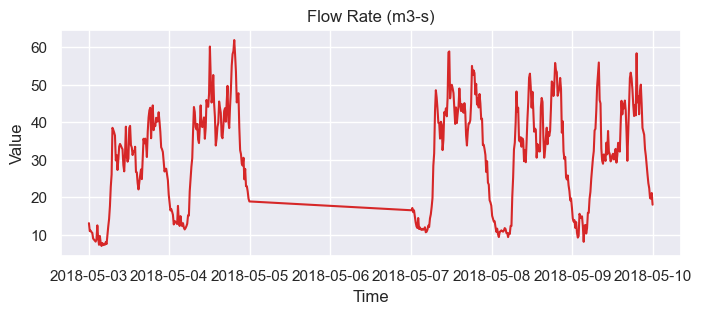

In [58]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Time', ylabel='Value', dpi=100):
    plt.figure(figsize=(8,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Flow Rate (m3-s)')    

### Decompose a time series into its components

In [35]:
# Period of the series
result = seasonal_decompose(df, model='additive', period=1)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

datetime
2018-05-03 00:07:30    13.026578
2018-05-03 00:22:30    10.898906
2018-05-03 00:37:30    11.048772
2018-05-03 00:52:30    10.641706
2018-05-03 01:07:30    10.452578
                         ...    
2018-05-09 22:52:30    22.357783
2018-05-09 23:07:30    19.707922
2018-05-09 23:22:30    19.546844
2018-05-09 23:37:30    21.068406
2018-05-09 23:52:30    17.953072
Name: trend, Length: 480, dtype: float64
datetime
2018-05-03 00:07:30    0.0
2018-05-03 00:22:30    0.0
2018-05-03 00:37:30    0.0
2018-05-03 00:52:30    0.0
2018-05-03 01:07:30    0.0
                      ... 
2018-05-09 22:52:30    0.0
2018-05-09 23:07:30    0.0
2018-05-09 23:22:30    0.0
2018-05-09 23:37:30    0.0
2018-05-09 23:52:30    0.0
Name: seasonal, Length: 480, dtype: float64
datetime
2018-05-03 00:07:30    0.0
2018-05-03 00:22:30    0.0
2018-05-03 00:37:30    0.0
2018-05-03 00:52:30    0.0
2018-05-03 01:07:30    0.0
                      ... 
2018-05-09 22:52:30    0.0
2018-05-09 23:07:30    0.0
2018-05-09 2

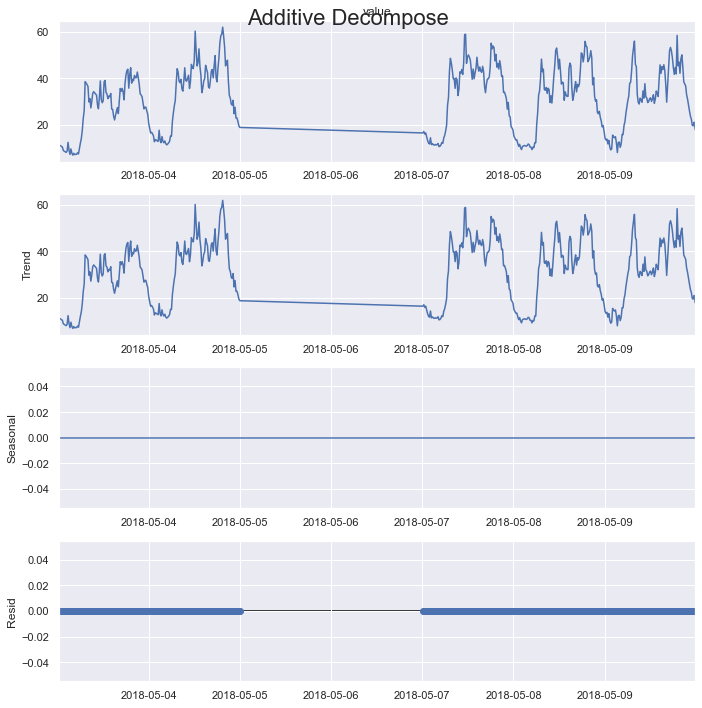

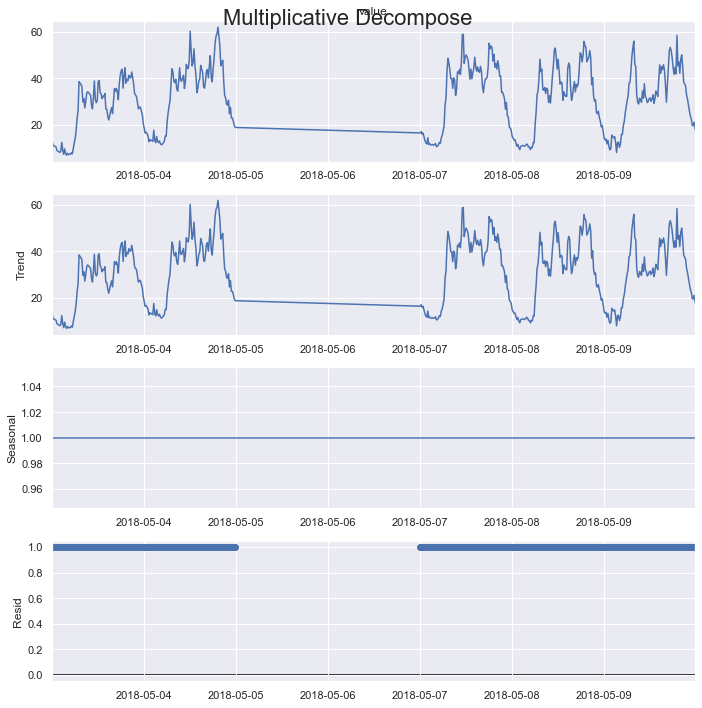

In [37]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq', period = 1)

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq', period = 1)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.show()

## Test data

In [4]:
test

,date,time,value,detection,int_date,timestamp,dayofweek,month
0,10/05/2018,00:07:30,15.713694,0,20180510,450,3,5
1,10/05/2018,00:22:30,14.460300,0,20180510,1350,3,5
2,10/05/2018,00:37:30,14.975789,0,20180510,2250,3,5
3,10/05/2018,00:52:30,14.658967,0,20180510,3150,3,5
4,10/05/2018,01:07:30,11.786478,0,20180510,4050,3,5
5,10/05/2018,01:22:30,10.446106,0,20180510,4950,3,5
6,10/05/2018,01:37:30,17.025783,0,20180510,5850,3,5
7,10/05/2018,01:52:30,17.597394,0,20180510,6750,3,5
8,10/05/2018,02:07:30,16.407461,0,20180510,7650,3,5
9,10/05/2018,02:22:30,15.341344,0,20180510,8550,3,5


In [5]:
# Start time and end time
train['date'].min(), train['date'].max()

('03/05/2018', '09/05/2018')

In [6]:
# Join columns date and time
test['datetime'] = test['date'] + ' ' + test['time']
test

,date,time,value,detection,int_date,timestamp,dayofweek,month,datetime
0,10/05/2018,00:07:30,15.713694,0,20180510,450,3,5,10/05/2018 00:07:30
1,10/05/2018,00:22:30,14.460300,0,20180510,1350,3,5,10/05/2018 00:22:30
2,10/05/2018,00:37:30,14.975789,0,20180510,2250,3,5,10/05/2018 00:37:30
3,10/05/2018,00:52:30,14.658967,0,20180510,3150,3,5,10/05/2018 00:52:30
4,10/05/2018,01:07:30,11.786478,0,20180510,4050,3,5,10/05/2018 01:07:30
5,10/05/2018,01:22:30,10.446106,0,20180510,4950,3,5,10/05/2018 01:22:30
6,10/05/2018,01:37:30,17.025783,0,20180510,5850,3,5,10/05/2018 01:37:30
7,10/05/2018,01:52:30,17.597394,0,20180510,6750,3,5,10/05/2018 01:52:30
8,10/05/2018,02:07:30,16.407461,0,20180510,7650,3,5,10/05/2018 02:07:30
9,10/05/2018,02:22:30,15.341344,0,20180510,8550,3,5,10/05/2018 02:22:30


In [7]:
# The strftime() method returns a string representing date and time using date, time or datetime object
test['datetime'] = pd.to_datetime(test['datetime'], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M:%S').astype(str)
# Visualize data
test

,date,time,value,detection,int_date,timestamp,dayofweek,month,datetime
0,10/05/2018,00:07:30,15.713694,0,20180510,450,3,5,2018-05-10 00:07:30
1,10/05/2018,00:22:30,14.460300,0,20180510,1350,3,5,2018-05-10 00:22:30
2,10/05/2018,00:37:30,14.975789,0,20180510,2250,3,5,2018-05-10 00:37:30
3,10/05/2018,00:52:30,14.658967,0,20180510,3150,3,5,2018-05-10 00:52:30
4,10/05/2018,01:07:30,11.786478,0,20180510,4050,3,5,2018-05-10 01:07:30
5,10/05/2018,01:22:30,10.446106,0,20180510,4950,3,5,2018-05-10 01:22:30
6,10/05/2018,01:37:30,17.025783,0,20180510,5850,3,5,2018-05-10 01:37:30
7,10/05/2018,01:52:30,17.597394,0,20180510,6750,3,5,2018-05-10 01:52:30
8,10/05/2018,02:07:30,16.407461,0,20180510,7650,3,5,2018-05-10 02:07:30
9,10/05/2018,02:22:30,15.341344,0,20180510,8550,3,5,2018-05-10 02:22:30


In [8]:
# Immutable ndarray-like of datetime64 data
# Represented internally as int64, and which can be boxed to Timestamp objects that are subclasses of datetime and carry metadata.
test['datetime'] = pd.DatetimeIndex(data=test['datetime'], dtype='datetime64[ns]', name='datetime', freq=None)

In [9]:
# Group DataFrame using a mapper or by a Series of columns
dfT = test.groupby('datetime')['value'].sum().reset_index()
# Visualize data
dfT

,datetime,value
0,2018-05-10 00:07:30,15.713694
1,2018-05-10 00:22:30,14.460300
2,2018-05-10 00:37:30,14.975789
3,2018-05-10 00:52:30,14.658967
4,2018-05-10 01:07:30,11.786478
5,2018-05-10 01:22:30,10.446106
6,2018-05-10 01:37:30,17.025783
7,2018-05-10 01:52:30,17.597394
8,2018-05-10 02:07:30,16.407461
9,2018-05-10 02:22:30,15.341344


In [10]:
# Set the DataFrame index using existing columns
dfT = dfT.set_index('datetime')
# The index (row labels) of the DataFrame
dfT.index

DatetimeIndex(['2018-05-10 00:07:30', '2018-05-10 00:22:30',
               '2018-05-10 00:37:30', '2018-05-10 00:52:30',
               '2018-05-10 01:07:30', '2018-05-10 01:22:30',
               '2018-05-10 01:37:30', '2018-05-10 01:52:30',
               '2018-05-10 02:07:30', '2018-05-10 02:22:30',
               '2018-05-10 02:37:30', '2018-05-10 02:52:30',
               '2018-05-10 03:07:30', '2018-05-10 03:22:30',
               '2018-05-10 03:37:30', '2018-05-10 03:52:30',
               '2018-05-10 04:07:30', '2018-05-10 04:22:30',
               '2018-05-10 04:37:30', '2018-05-10 04:52:30',
               '2018-05-10 05:07:30', '2018-05-10 05:22:30',
               '2018-05-10 05:37:30', '2018-05-10 05:52:30',
               '2018-05-10 06:07:30', '2018-05-10 06:22:30',
               '2018-05-10 06:37:30', '2018-05-10 06:52:30',
               '2018-05-10 07:07:30', '2018-05-10 07:22:30',
               '2018-05-10 07:37:30', '2018-05-10 07:52:30',
               '2018-05-

In [11]:
# Visualize data
dfT

,value
datetime,
2018-05-10 00:07:30,15.713694
2018-05-10 00:22:30,14.460300
2018-05-10 00:37:30,14.975789
2018-05-10 00:52:30,14.658967
2018-05-10 01:07:30,11.786478
2018-05-10 01:22:30,10.446106
2018-05-10 01:37:30,17.025783
2018-05-10 01:52:30,17.597394
2018-05-10 02:07:30,16.407461
